# Data Loading and Initial Look

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
# Load the data
file_path = "mushrooms.csv"  
df = pd.read_csv(file_path)

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [58]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [59]:
# 1. Number of rows and features
num_rows, num_features = df.shape
print(f"Number of rows (data points): {num_rows}")
print(f"Number of features: {num_features}")

Number of rows (data points): 8124
Number of features: 23


In [60]:
# 2. Check for missing values
missing_values = df.isnull().sum()
total_missing = missing_values.sum()
print(f"Total missing values: {total_missing}")
print("Missing values per feature:")
print(missing_values)

Total missing values: 0
Missing values per feature:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [61]:
# 3. Feature summary table
feature_summary = []
for column in df.columns:
    if df[column].dtype == 'object' or df[column].nunique() <= 20:
        # Categorical feature
        feature_type = "Categorical"
        values = df[column].unique()
    else:
        # Numerical feature
        feature_type = "Numerical"
        values = f"{data[column].min()} to {df[column].max()}"
    
    missing = missing_values[column]
    feature_summary.append({
        "Feature": column,
        "Type": feature_type,
        "Values": values,
        "Missing Values": missing
    })

feature_summary_df = pd.DataFrame(feature_summary)
print("\nFeature Summary Table:")
print(feature_summary_df)


Feature Summary Table:
                     Feature         Type  \
0                      class  Categorical   
1                  cap-shape  Categorical   
2                cap-surface  Categorical   
3                  cap-color  Categorical   
4                    bruises  Categorical   
5                       odor  Categorical   
6            gill-attachment  Categorical   
7               gill-spacing  Categorical   
8                  gill-size  Categorical   
9                 gill-color  Categorical   
10               stalk-shape  Categorical   
11                stalk-root  Categorical   
12  stalk-surface-above-ring  Categorical   
13  stalk-surface-below-ring  Categorical   
14    stalk-color-above-ring  Categorical   
15    stalk-color-below-ring  Categorical   
16                 veil-type  Categorical   
17                veil-color  Categorical   
18               ring-number  Categorical   
19                 ring-type  Categorical   
20         spore-print-color  C

## Data Visualization

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression: 
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.
        
* Note that for categorical features, often times the information in the histogram could be better presented in a table.    
* Make comments on what features look most promising for ML task.

class
e    4208
p    3916
Name: count, dtype: int64


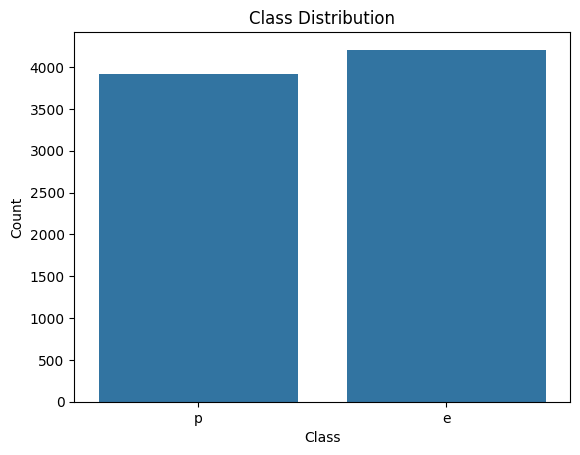

In [62]:
# Class distribution
print(df['class'].value_counts())

# Visualize the distribution
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Feature: cap-shape
class         e     p
cap-shape            
b           404    48
c             0     4
f          1596  1556
k           228   600
s            32     0
x          1948  1708
----------------------------------------


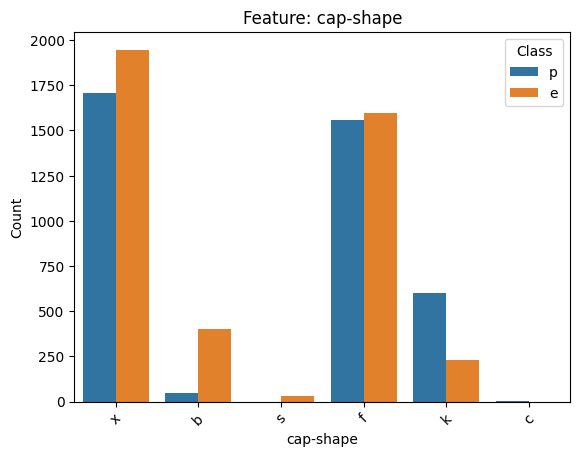

Feature: cap-surface
class           e     p
cap-surface            
f            1560   760
g               0     4
s            1144  1412
y            1504  1740
----------------------------------------


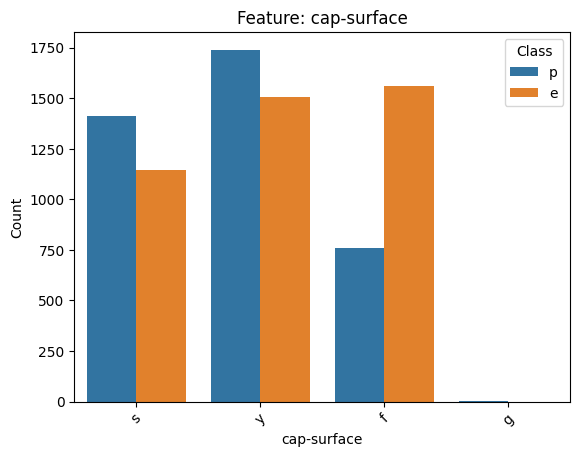

Feature: cap-color
class         e     p
cap-color            
b            48   120
c            32    12
e           624   876
g          1032   808
n          1264  1020
p            56    88
r            16     0
u            16     0
w           720   320
y           400   672
----------------------------------------


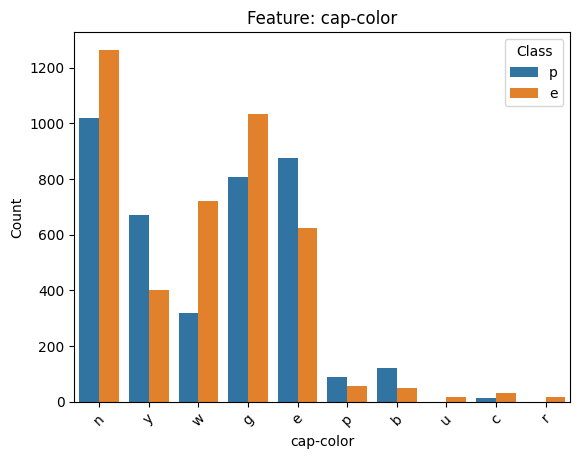

Feature: bruises
class       e     p
bruises            
f        1456  3292
t        2752   624
----------------------------------------


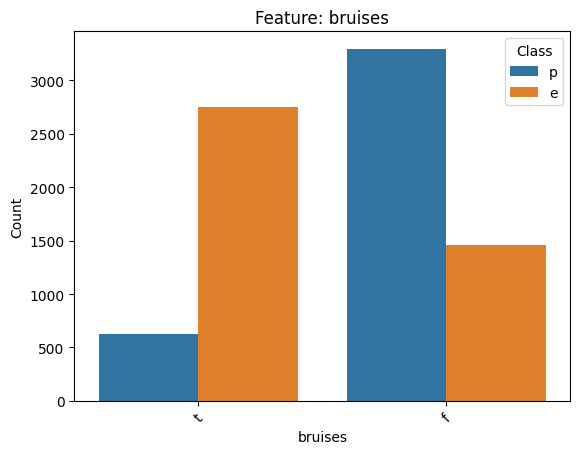

Feature: odor
class     e     p
odor             
a       400     0
c         0   192
f         0  2160
l       400     0
m         0    36
n      3408   120
p         0   256
s         0   576
y         0   576
----------------------------------------


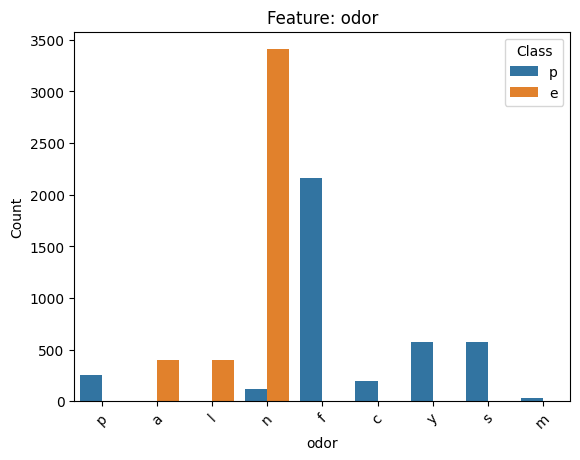

Feature: gill-attachment
class               e     p
gill-attachment            
a                 192    18
f                4016  3898
----------------------------------------


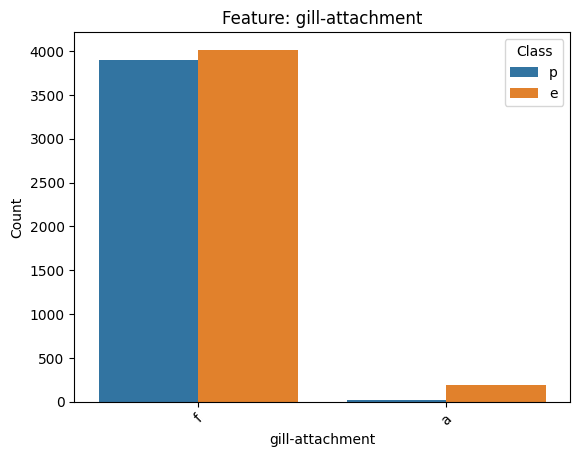

Feature: gill-spacing
class            e     p
gill-spacing            
c             3008  3804
w             1200   112
----------------------------------------


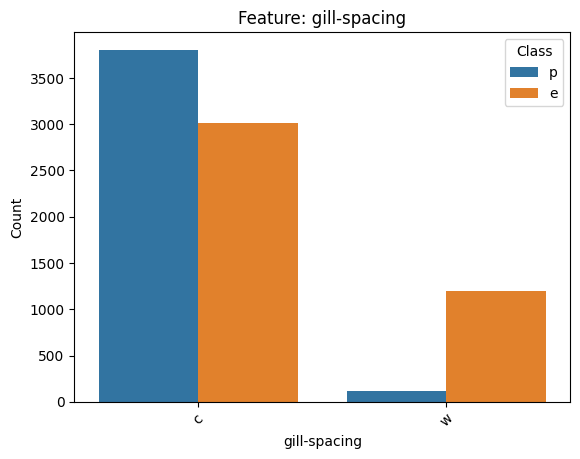

Feature: gill-size
class         e     p
gill-size            
b          3920  1692
n           288  2224
----------------------------------------


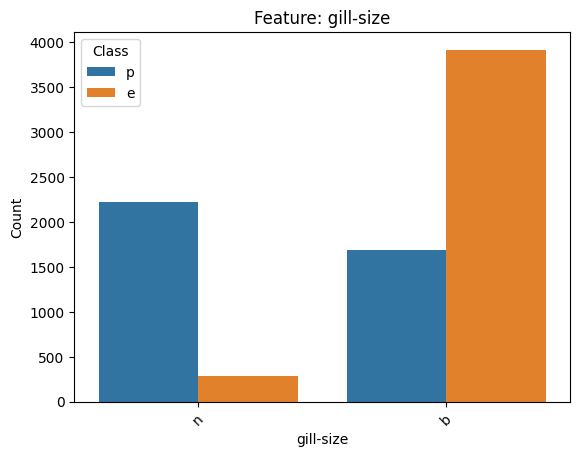

Feature: gill-color
class         e     p
gill-color           
b             0  1728
e            96     0
g           248   504
h           204   528
k           344    64
n           936   112
o            64     0
p           852   640
r             0    24
u           444    48
w           956   246
y            64    22
----------------------------------------


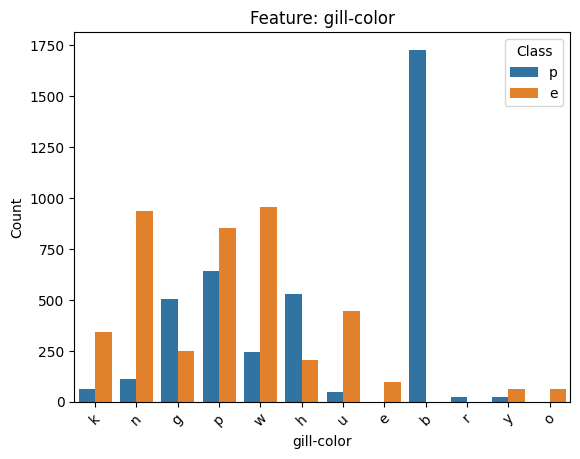

Feature: stalk-shape
class           e     p
stalk-shape            
e            1616  1900
t            2592  2016
----------------------------------------


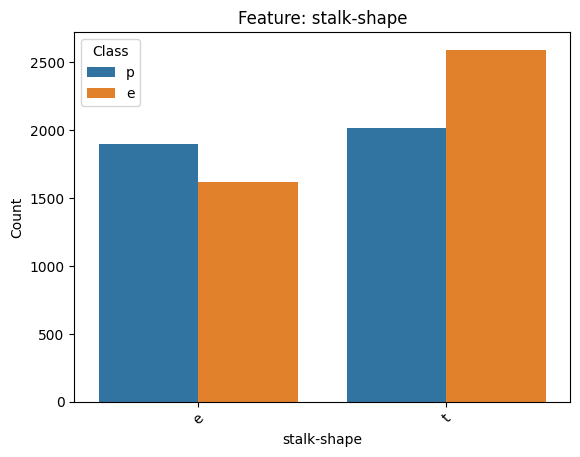

Feature: stalk-root
class          e     p
stalk-root            
?            720  1760
b           1920  1856
c            512    44
e            864   256
r            192     0
----------------------------------------


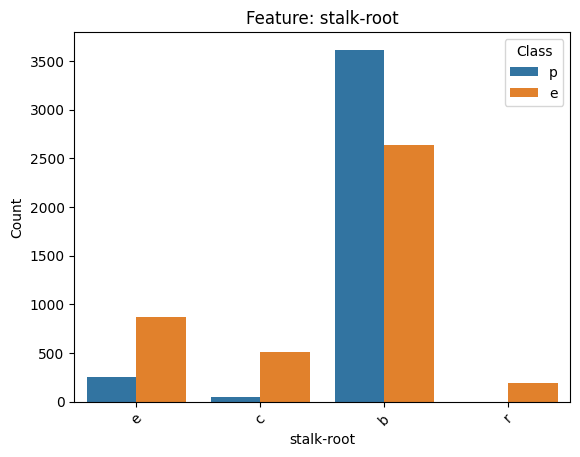

Feature: stalk-surface-above-ring
class                        e     p
stalk-surface-above-ring            
f                          408   144
k                          144  2228
s                         3640  1536
y                           16     8
----------------------------------------


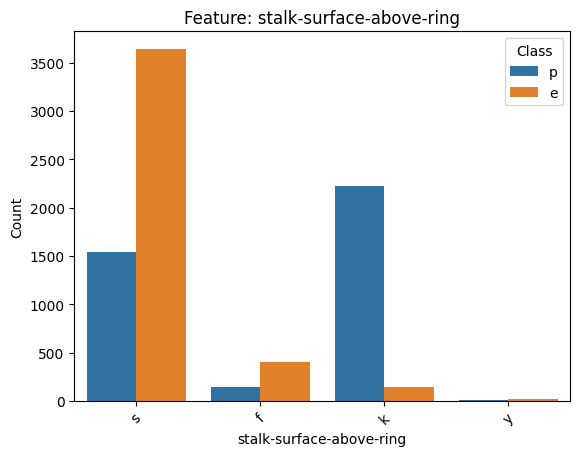

Feature: stalk-surface-below-ring
class                        e     p
stalk-surface-below-ring            
f                          456   144
k                          144  2160
s                         3400  1536
y                          208    76
----------------------------------------


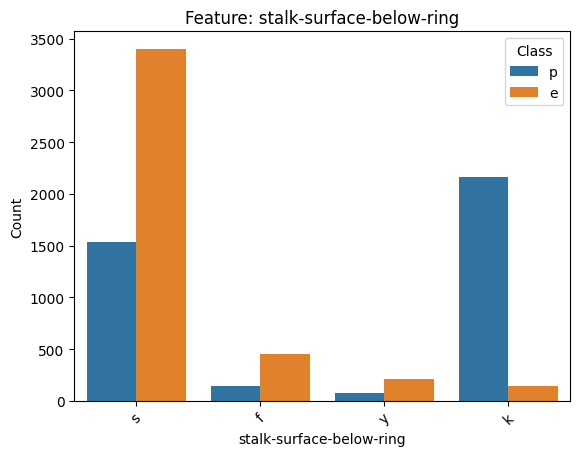

Feature: stalk-color-above-ring
class                      e     p
stalk-color-above-ring            
b                          0   432
c                          0    36
e                         96     0
g                        576     0
n                         16   432
o                        192     0
p                        576  1296
w                       2752  1712
y                          0     8
----------------------------------------


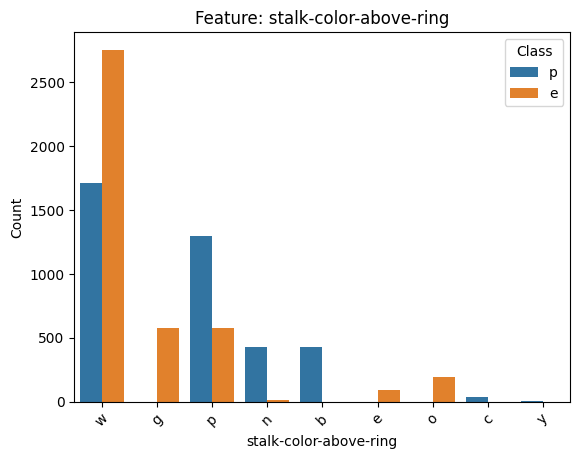

Feature: stalk-color-below-ring
class                      e     p
stalk-color-below-ring            
b                          0   432
c                          0    36
e                         96     0
g                        576     0
n                         64   448
o                        192     0
p                        576  1296
w                       2704  1680
y                          0    24
----------------------------------------


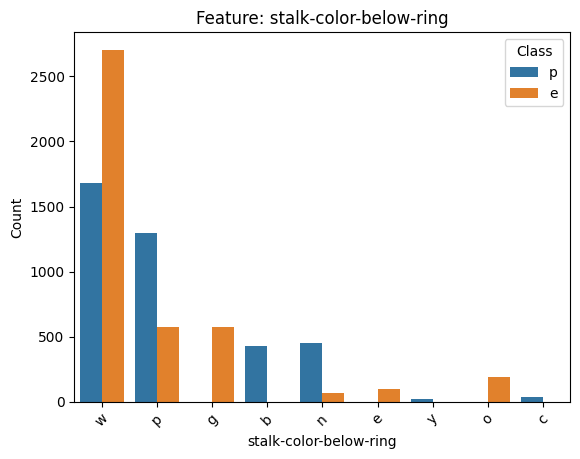

Feature: veil-type
class         e     p
veil-type            
p          4208  3916
----------------------------------------


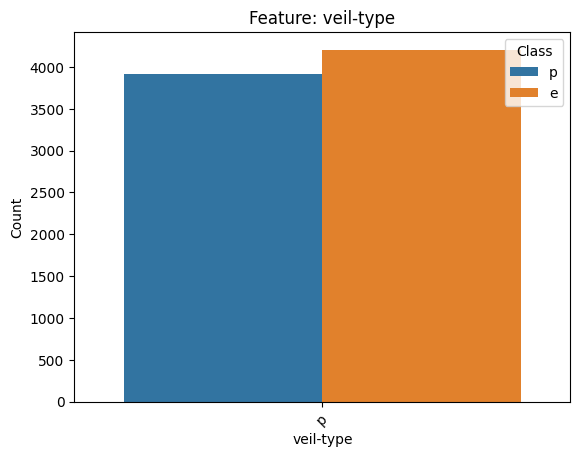

Feature: veil-color
class          e     p
veil-color            
n             96     0
o             96     0
w           4016  3908
y              0     8
----------------------------------------


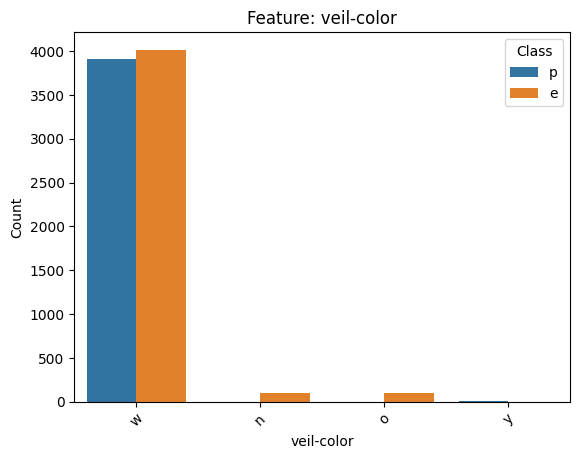

Feature: ring-number
class           e     p
ring-number            
n               0    36
o            3680  3808
t             528    72
----------------------------------------


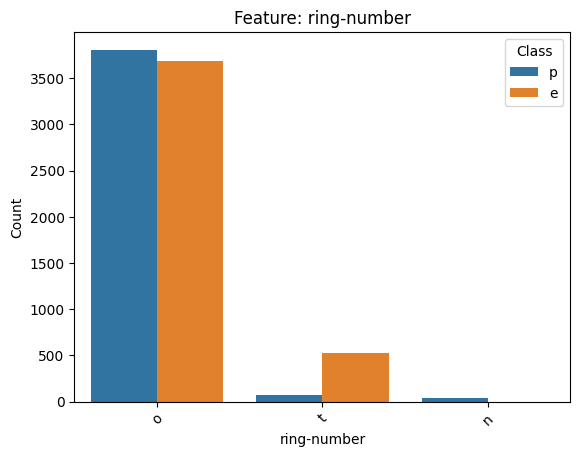

Feature: ring-type
class         e     p
ring-type            
e          1008  1768
f            48     0
l             0  1296
n             0    36
p          3152   816
----------------------------------------


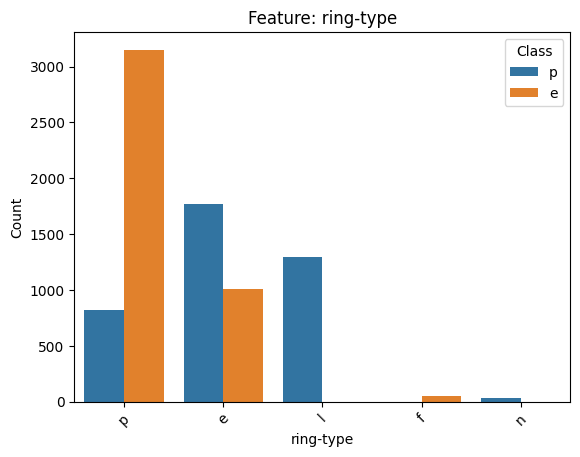

Feature: spore-print-color
class                 e     p
spore-print-color            
b                    48     0
h                    48  1584
k                  1648   224
n                  1744   224
o                    48     0
r                     0    72
u                    48     0
w                   576  1812
y                    48     0
----------------------------------------


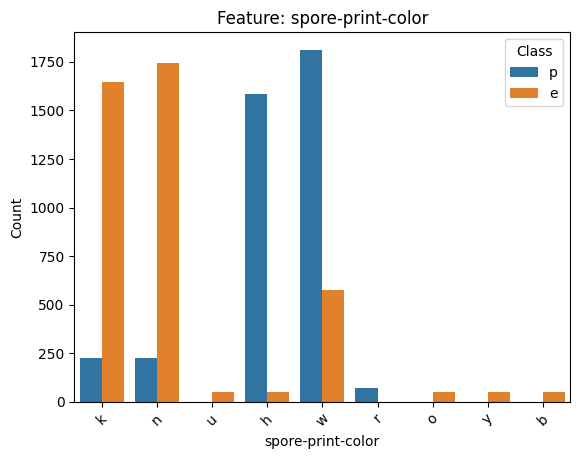

Feature: population
class          e     p
population            
a            384     0
c            288    52
n            400     0
s            880   368
v           1192  2848
y           1064   648
----------------------------------------


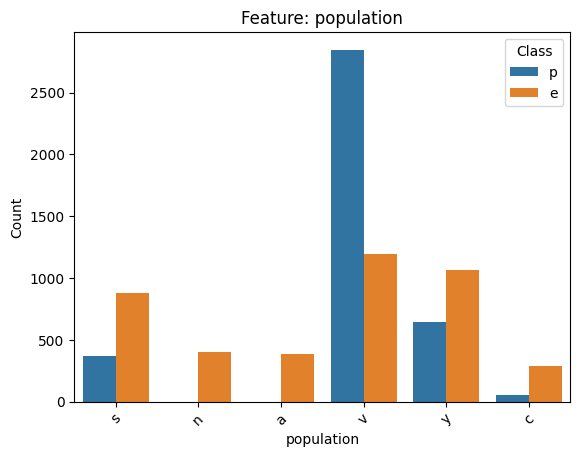

Feature: habitat
class       e     p
habitat            
d        1880  1268
g        1408   740
l         240   592
m         256    36
p         136  1008
u          96   272
w         192     0
----------------------------------------


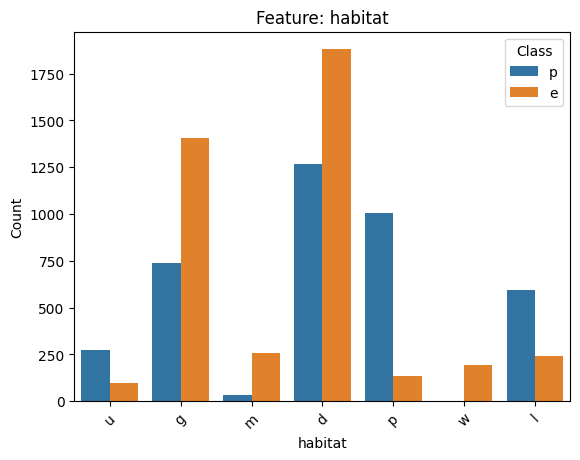

In [63]:
for feature in df.columns:
    if feature == "class":
        continue  # Skip the target column
    
    # Cross-tabulation for categorical features
    print(f"Feature: {feature}")
    cross_tab = pd.crosstab(df[feature], df['class'])
    print(cross_tab)
    print("-" * 40)

    # Visualize distributions
    sns.countplot(data=data, x=feature, hue="class")
    plt.title(f"Feature: {feature}")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title="Class")
    plt.xticks(rotation=45)
    plt.show()


e = cap-surface: f, cap-color: w, bruises: t, odor: a, l, n, gill-spacing: w, gill-size: b, gill color: n, w, u, e, o. stalk shape: t, stalk-root: e, c, stalk-surface-above-ring: s, stalk-surface-below-ring: s, stalk-color-above-ring: w, g, e, o, stalk-color-below-ring: w, g, e, o, ring-type: p, spore-print-color: k, n,o, y, b, population: s, n, a, habitat: g, d

p = cap-shape: k, cap-color: e, bruises: f, odor: f, c, y, s, gill-spacing: c, gill-size: n, gill-color: b, stalk-root: ?, stalk-surface-above-ring: k, stalk-surface-below-ring: k, stalk-color-above-ring: p, stalk-color-below-ring: p, ring-type: e, l, spore-print-color: h, w, r. population: v, habitat: u, g, p, l

## Data Cleaning and Preparation for Machine Learning

The feature, stalk-root, has missing value called "?"
This is replaced with the corresponding class of "p" or "e"

In [64]:
# Impute class-specific mode
for class_value in df['class'].unique():
    class_mode = df[df['class'] == class_value]['stalk-root'].mode()[0]
    df.loc[(df['stalk-root'] == '?') & (df['class'] == class_value), 'stalk-root'] = class_mode


stalk-root
b    6256
e    1120
c     556
r     192
Name: count, dtype: int64


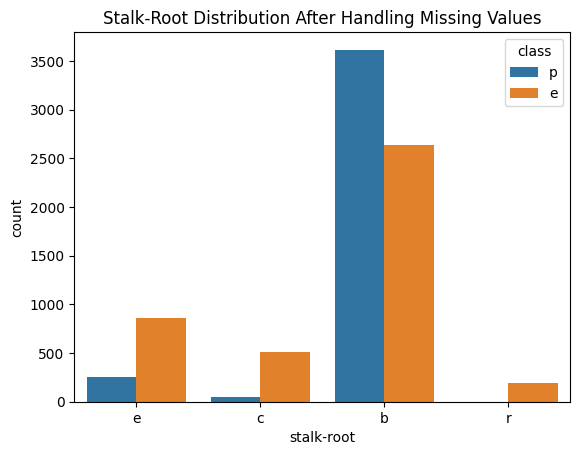

In [65]:
#Check the impact of the cleaning
print(df['stalk-root'].value_counts())

# Visualize the distribution
sns.countplot(x='stalk-root', data=data, hue='class')
plt.title('Stalk-Root Distribution After Handling Missing Values')
plt.show()

In [66]:
df.drop(columns=['gill-attachment', 'veil-type'])

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,c,n,k,e,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,c,b,k,e,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,c,b,n,e,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,c,n,n,e,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,w,b,k,t,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,c,b,y,e,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,c,b,y,e,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,c,b,n,e,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,c,n,b,t,...,s,k,w,w,w,o,e,w,v,l


In [67]:
print(df.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [68]:
#One-hot encode the categorical features
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False)

target = df['class']

# Apply one-hot encoding
encoded_features = encoder.fit_transform(df.drop(columns=['class']))

# Create a new DataFrame for the encoded features
encoded_columns = encoder.get_feature_names_out(df.drop(columns=['class']).columns)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

# Combine the encoded features with the target
prepared_data = pd.concat([encoded_df, target.reset_index(drop=True)], axis=1)
print(prepared_data.head())

   cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          1.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0          1.0            0.0            0.0            1.0            0.0   
1          1.0            0.0            0.0            1.0            0.0   
2          0.0            0.0            0.0            1.0            0.0   
3          1.0            0.0            0.0            0.0            1.0   
4          1.0            0.0            0.0            1.0            0.0   

   ...  population_v  population_y  habitat_d  habitat_g  habitat_l  \
0  ...           0.0           0.0     

In [69]:
#The target 'class' is still categorical
print(prepared_data.info())
print(prepared_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to class
dtypes: float64(116), object(1)
memory usage: 7.3+ MB
None
   cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          1.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0          1.0            0.0            0.0            1.0            0.0   
1          1.0            0.0            0.0            1.0            0.0   
2          0.0            0.0            0.0            1.0            0.0   
3          1.0            0.0            0.0            0.0            1.0   
4          1.

## Machine Learning

In [70]:
print(prepared_data.columns)

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_v', 'population_y', 'habitat_d', 'habitat_g', 'habitat_l',
       'habitat_m', 'habitat_p', 'habitat_u', 'habitat_w', 'class'],
      dtype='object', length=117)


In [71]:
df = prepared_data.drop_duplicates()

In [72]:
df = df.copy() 
df['class'] = df['class'].map({'p': 1, 'e': 0})  

In [73]:
df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [76]:
#Split into train, validationm and test set
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['class'])
y = df['class']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

Train size: 4874, Validation size: 1625, Test size: 1625


In [77]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [78]:
from sklearn.metrics import accuracy_score

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Evaluate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

Validation Accuracy: 1.00
